# Bank Loan Predication

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Loan_default.csv")

In [3]:
data

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [4]:
df = data.copy() 

In [5]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [6]:
df.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [7]:
df.isna().sum().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

train test split kartana data ha non numeric hota so data tain hot naslyane to fit pan hot navta tya sathi non numeric columns mnj object data type columns he find karayche tya nanter te drop karayche 

In [9]:
non_numeric_cols = df.select_dtypes(include='object').columns
print(non_numeric_cols)

Index(['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')


In [10]:
for col in non_numeric_cols:
    print(col, df[col].unique())

#print all object columns with their unique values 

LoanID ['I38PQUQS96' 'HPSK72WA7R' 'C1OZ6DPJ8Y' ... 'XQK1UUUNGP' 'JAO28CPL4H'
 'ZTH91CGL0B']
Education ["Bachelor's" "Master's" 'High School' 'PhD']
EmploymentType ['Full-time' 'Unemployed' 'Self-employed' 'Part-time']
MaritalStatus ['Divorced' 'Married' 'Single']
HasMortgage ['Yes' 'No']
HasDependents ['Yes' 'No']
LoanPurpose ['Other' 'Auto' 'Business' 'Home' 'Education']
HasCoSigner ['Yes' 'No']


In [11]:
df.drop('LoanID', axis=1, inplace=True)

In [12]:
df.drop('Education', axis=1, inplace=True)

In [13]:
df.drop('EmploymentType', axis=1, inplace=True)

In [14]:
df.drop('MaritalStatus', axis=1, inplace=True)

In [15]:
df.drop('HasMortgage', axis=1, inplace=True)

In [16]:
df.drop('HasDependents', axis=1, inplace=True)

In [17]:
df.drop('LoanPurpose', axis=1, inplace=True)

In [18]:
df.drop('HasCoSigner', axis=1, inplace=True)

In [19]:
df['Default']

0         0
1         0
2         1
3         0
4         0
         ..
255342    0
255343    1
255344    0
255345    0
255346    0
Name: Default, Length: 255347, dtype: int64

In [20]:
df["Age"].value_counts()

Age
55    5064
40    5056
65    5027
33    5022
53    5010
62    4999
34    4987
45    4985
61    4982
39    4973
22    4970
32    4969
43    4965
19    4963
35    4961
68    4958
38    4955
30    4954
49    4952
50    4949
27    4945
47    4931
57    4925
54    4921
31    4908
44    4906
36    4906
28    4906
56    4902
26    4891
21    4889
46    4887
18    4884
58    4883
67    4876
51    4876
59    4871
24    4869
29    4865
63    4862
20    4861
37    4856
66    4841
25    4840
64    4840
69    4817
41    4815
48    4810
42    4803
60    4772
52    4748
23    4740
Name: count, dtype: int64

In [21]:
# count how many unique value are present in one column by using for loop   
un = df.columns
for unique in un:
    print('len',len(df[unique].unique()))
    if len(df[unique]) < 10:
        print('Unique', df[unique].unique())

len 52
len 114620
len 158729
len 550
len 120
len 4
len 2301
len 5
len 81
len 2


VISUALIZATION

In [22]:
#sns.pairplot(data)
#plt.show()

In [23]:
# Assuming 'data' is your DataFrame

#sns.pairplot(data, hue='Default')
#plt.show()

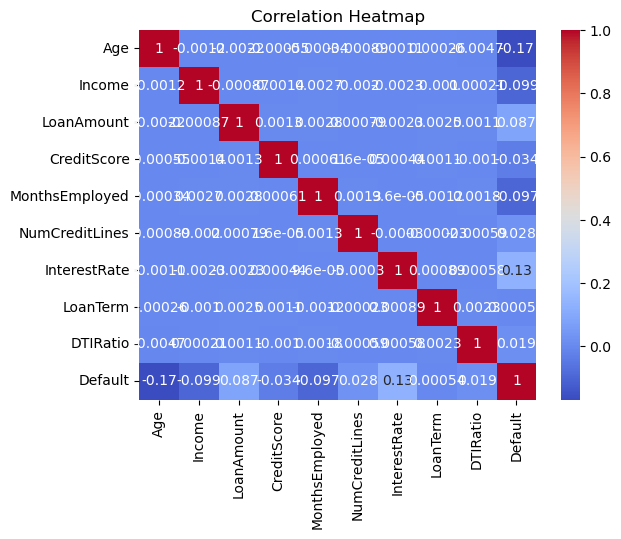

In [24]:
# Calculate correlations
correlation_matrix = df.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


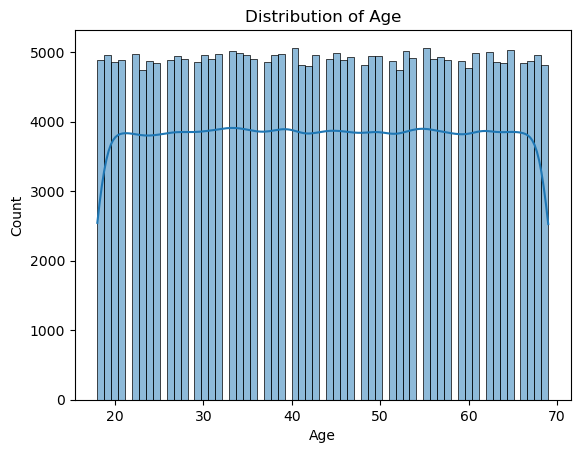

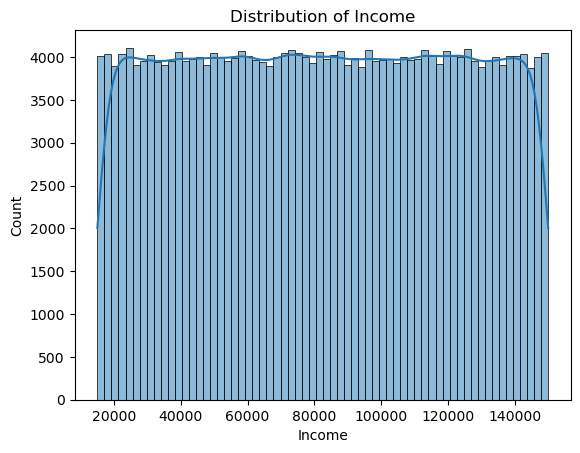

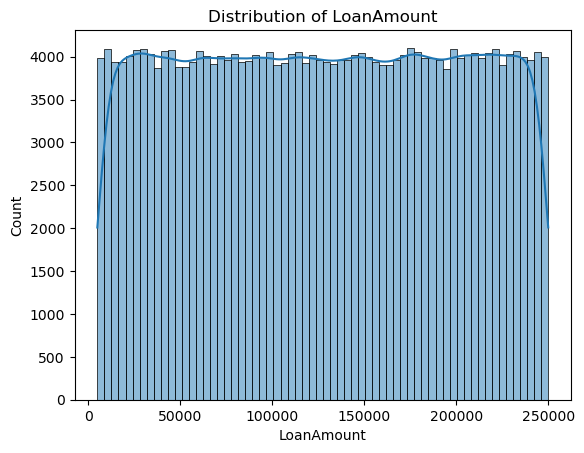

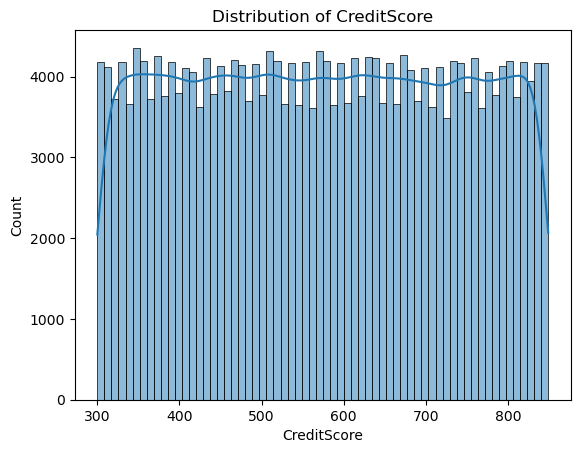

In [25]:
#distrubution plot

# Plot distributions of numerical columns
num_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore']
for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

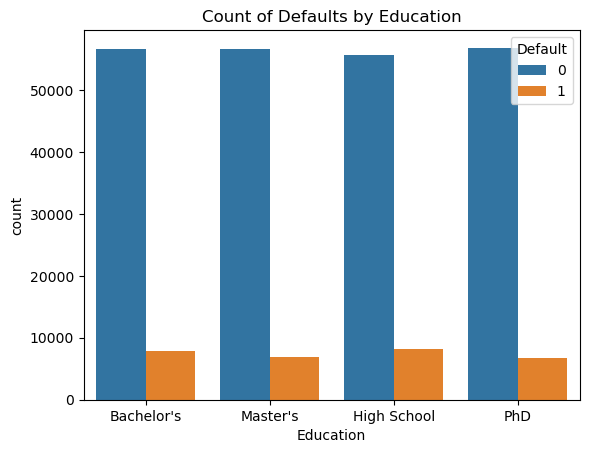

In [26]:
# Assuming 'Education' is a categorical column
sns.countplot(x='Education', data=data, hue='Default')
plt.title('Count of Defaults by Education')
plt.show()

In [54]:
# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
df[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [28]:
df[numerical_cols]

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
0,0.833990,0.089693,-1.086833,-0.341492,0.590533,1.341937,0.261771,-0.001526,-0.260753
1,1.701221,-0.823021,-0.044309,-0.731666,-1.285731,-1.343791,-1.308350,1.412793,0.778585
2,0.166888,0.043854,0.022715,-0.775718,-0.968209,0.446694,1.156831,-0.708685,-0.823728
3,-0.767053,-1.303452,-1.168538,1.061875,-1.718715,0.446694,-0.967805,-0.708685,-1.170174
4,1.100830,-1.592855,-1.671921,0.369631,-1.487790,1.341937,-1.052188,0.705634,0.995114
...,...,...,...,...,...,...,...,...,...
255342,-1.634285,-1.142632,1.173101,-0.209337,1.427636,1.341937,0.093006,-1.415845,1.514783
255343,-0.767053,-0.783984,0.879724,-0.398130,-1.314597,-0.448549,-0.292744,-0.708685,-1.256785
255344,0.833990,0.059562,1.139391,0.143078,0.301877,0.446694,-1.236022,1.412793,-0.000918
255345,-0.099952,0.066979,-0.945840,1.477221,-0.564091,-1.343791,1.116146,0.705634,-0.260753


In [56]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components= 9)  # Specify the number of components
pca_features = pca.fit_transform(data[numerical_cols])


ValueError: Expected a 1D array, got an array with shape (255347, 9)

In [57]:
numerical_cols

['Age',
 'Income',
 'LoanAmount',
 'CreditScore',
 'MonthsEmployed',
 'NumCreditLines',
 'InterestRate',
 'LoanTerm',
 'DTIRatio']

LOGISTICK REGRESSION

In [31]:
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
0,0.833990,0.089693,-1.086833,-0.341492,0.590533,1.341937,0.261771,-0.001526,-0.260753,0
1,1.701221,-0.823021,-0.044309,-0.731666,-1.285731,-1.343791,-1.308350,1.412793,0.778585,0
2,0.166888,0.043854,0.022715,-0.775718,-0.968209,0.446694,1.156831,-0.708685,-0.823728,1
3,-0.767053,-1.303452,-1.168538,1.061875,-1.718715,0.446694,-0.967805,-0.708685,-1.170174,0
4,1.100830,-1.592855,-1.671921,0.369631,-1.487790,1.341937,-1.052188,0.705634,0.995114,0
...,...,...,...,...,...,...,...,...,...,...
255342,-1.634285,-1.142632,1.173101,-0.209337,1.427636,1.341937,0.093006,-1.415845,1.514783,0
255343,-0.767053,-0.783984,0.879724,-0.398130,-1.314597,-0.448549,-0.292744,-0.708685,-1.256785,1
255344,0.833990,0.059562,1.139391,0.143078,0.301877,0.446694,-1.236022,1.412793,-0.000918,0
255345,-0.099952,0.066979,-0.945840,1.477221,-0.564091,-1.343791,1.116146,0.705634,-0.260753,0


In [32]:
# Split dataset into features and target variable
X = df.drop('Default', axis=1)
y = df['Default']

In [33]:
# Split data into training and testing sets
X_tr1, X_te1, y_tr1, y_te1 = train_test_split(X, y, test_size=0.75, random_state=25)

In [34]:
# Initialize and train a model (for example, Logistic Regression)
model = LogisticRegression()
model.fit(X_tr1, y_tr1)

LogisticRegression()

In [35]:
y_pred = model.predict(X_te1)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
accuracy_score(y_te1, y_pred)

0.8835837105962582

In [37]:
confusion_matrix(y_te1, y_pred)

array([[168719,    354],
       [ 21941,    497]], dtype=int64)

In [38]:
print(classification_report(y_te1,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94    169073
           1       0.58      0.02      0.04     22438

    accuracy                           0.88    191511
   macro avg       0.73      0.51      0.49    191511
weighted avg       0.85      0.88      0.83    191511



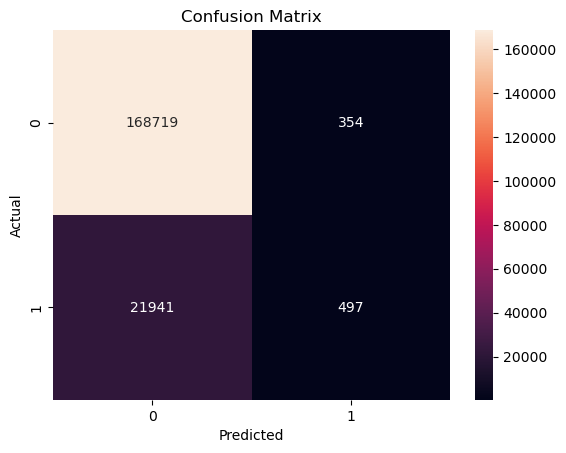

In [39]:
# Confusion Matrix
conf_mat = confusion_matrix(y_te1, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [40]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_tr1, y_tr1)

best_model = grid_search.best_estimator_
best_model.fit(X_tr1, y_tr1)


LogisticRegression(C=0.1)

RANDOM FOREST

In [41]:
X_tr2, X_te2, y_tr2, y_te2 = train_test_split(X,y, train_size=0.75, random_state= 25)

In [42]:
model = RandomForestClassifier(n_estimators=100, max_depth=2)

In [43]:
model.fit(X_tr2,y_tr2)

RandomForestClassifier(max_depth=2)

In [44]:
y_pred2 = model.predict(X_te2)
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
accuracy_score(y_te2, y_pred2)

0.8835314942744803

In [46]:
confusion_matrix(y_te2, y_pred2)

array([[56402,     0],
       [ 7435,     0]], dtype=int64)

In [47]:
print(classification_report(y_te2,y_pred2))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     56402
           1       0.00      0.00      0.00      7435

    accuracy                           0.88     63837
   macro avg       0.44      0.50      0.47     63837
weighted avg       0.78      0.88      0.83     63837



In [48]:
svm = SVC(kernel='poly')

In [49]:
X_tr3, X_te3, y_tr3, y_te3 = train_test_split(X, y, train_size=0.75, random_state=43)

In [50]:
svm.fit(X_tr1, y_tr1)

SVC(kernel='poly')

In [51]:
y_pred3 = svm.predict(X_te3)
y_pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
accuracy_score(y_te3, y_pred1)

NameError: name 'y_pred1' is not defined